In [ ]:
!apt install enchant
!pip install PyEnchant

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,310 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtext-iconv-perl amd64 1.7-5build6 [

In [ ]:
import nltk
nltk.download('punkt')
import numpy as np
import string
from nltk.util import ngrams
import re
import pickle
import random
import math
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import enchant

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Project/Dataset/CodeMix_train.txt"
# train_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Assignment 2/brown.txt"
# train_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Project/Dataset/test.txt"
# train_path = "/content/drive/My Drive/CodeMix_train.txt"
train_file = open(train_path, "r")
count=0
train_data=""

# for lines in train_file:
#   if count<50: 
#     # print(lines)
#     #Removing punctuations, converting to lower case
#     lines = lines.replace("<unk>","") #removing <unk> string
#     train_data += "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
#   else: break
#   count+=1

for lines in train_file:
  #Removing punctuations, converting to lower case
  lines = lines.replace("<unk>","") #removing <unk> string
  train_data += "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"

train_file.close()

In [ ]:
# print(train_data)

In [ ]:
print(len(train_data.split('\n')))
# print(train_data[:10000])
# train_data = train_data[:10000]

9876426


In [ ]:
corpus = train_data.split('\n')[:10000]
sentences = [nltk.word_tokenize(sent) for sent in corpus]
tokens = sum(sentences, [])
tokens.append('UNK')
words = set(tokens)
five_grams=[]

for sent in sentences:
    if len(sent) < 5:
        continue
    tmp = ngrams(sent, 5)
    for gram in tmp:
        five_grams.append(gram)

print(len(words))
print(len(five_grams))

21194
155161


In [ ]:
# create integer-to-token mapping
int2token = {}

count = 0
for w in words:
  int2token[count] = w
  count+= 1

# create token-to-integer mapping
token2int = {t: i for i, t in int2token.items()}

print(len(token2int),len(int2token))

21194 21194


In [ ]:
print(token2int)
print(int2token)

{'bakawas': 0, 'jsto': 1, 'thaa': 2, 'bolta': 3, 'ladwate': 4, 'pitane': 5, 'dhuli': 6, 'bekar': 7, 'wajood': 8, 'b': 9, 'mosi': 10, 'tumharey': 11, 'kadar': 12, 'chukay': 13, 'factor': 14, 'permotion': 15, 'toys': 16, 'maanti': 17, 'dobaara': 18, 'hillary': 19, 'dosto': 20, 'ovary': 21, 'sadiya': 22, 'hariana': 23, 'keede': 24, 'chidha': 25, 'dhoond': 26, 'mati': 27, 'choot': 28, 'protecting': 29, 'walong': 30, 'khaber': 31, 'neeti': 32, 'karwane': 33, 'wd': 34, 'budhimani': 35, 'wal': 36, 'zimmedaar': 37, 'appriciate': 38, 'sawaal': 39, 'wan': 40, 'lro': 41, 'world': 42, 'appoint': 43, 'display': 44, 'allahu': 45, 'khilari': 46, 'height': 47, 'lyf': 48, 'saudi': 49, 'employes': 50, 'months': 51, 'bhgat': 52, 'jidagi': 53, 'shobha': 54, 'kiti': 55, 'bister': 56, 'joota': 57, 'chize': 58, 'boltey': 59, 'mahi': 60, 'badmaashi': 61, 'smile': 62, 'jadoo': 63, 'vajha': 64, 'chal': 65, '23': 66, 'dekhenge': 67, 'see': 68, 'son': 69, 'orphanages': 70, 'sudra': 71, 'navy': 72, 'usehi': 73, 'a

In [ ]:
import pickle as pkl

with open('/content/int2tok.pkl', 'wb') as f:
    pkl.dump(int2token, f)
    f.close()
    
with open('/content/tok2int.pkl', 'wb') as f:
    pkl.dump(token2int, f)
    f.close()

In [ ]:
print(token2int['UNK'])

11418


In [ ]:
vocab_size = len(words)
print(vocab_size)

21194


In [ ]:
print(tokens[:10])
print(len(tokens))

['ye', 'to', 'hona', 'hi', 'tha', 'kabhi', 'kisi', 'neta', 'ko', 'saja']
195160


In [ ]:
import collections

word_counter = collections.Counter()
for term in tokens:
    word_counter.update({term: 1})

ind=0
for i in word_counter:
  if (word_counter[i]==1): 
    ind+=1

print(ind)

11763


In [ ]:
# create inputs and targets (x and y)
x = []
y = []

for s in five_grams:
    x.append(s[:-1])
    y.append(s[1:])

p_tr_x = []
p_tr_y = []
for s in five_grams:
    temp_x = []
    temp_y = []
    for gram in s:
        temp_x.append(gram[:-1])
        temp_y.append(gram[1:])
    p_tr_x.append(temp_x)
    p_tr_y.append(temp_y)

In [ ]:
def get_integer_seq(seq):
    ret = []
    for w in seq:
        if w in token2int:
            ret.append(token2int[w])
        else:
            ret.append(token2int['UNK'])
    
    return ret

def get_lang_seq(seq):
    temp = []
    d = enchant.Dict("en_IN")
    for w in seq:
        if d.check(w): temp.append(1) #1 for English
        else: temp.append(0) #0 for Hindi
    return temp

# convert text sequences to integer sequences
x_int = [get_integer_seq(i) for i in x]
y_int = [get_integer_seq(i) for i in y]

# convert lists to numpy arrays
x_int = np.array(x_int)
y_int = np.array(y_int)

print(x_int.shape)


# convert text sequences to integer sequences
x_lang = [get_lang_seq(i) for i in x]
y_lang = [get_lang_seq(i) for i in y]

# convert lists to numpy arrays
x_lang = np.array(x_lang)
y_lang = np.array(y_lang)

print(x_lang.shape)


(155161, 4)
(155161, 4)


In [ ]:
print(x_int[:10])
print(x_lang[:10])

[[14777  3260 20964 18154]
 [ 3260 20964 18154  8818]
 [20964 18154  8818   412]
 [18154  8818   412  8330]
 [ 8818   412  8330  6931]
 [  412  8330  6931  1517]
 [ 8330  6931  1517  3754]
 [ 6931  1517  3754 19510]
 [ 1517  3754 19510 18154]
 [ 3754 19510 18154 10869]]
[[1 1 0 1]
 [1 0 1 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 1 1]]


In [ ]:
def get_batches(arr_x, arr_y, lang_x, lang_y, batch_size): 
    # iterate through the arrays
    prv = 0
    for n in range(batch_size, arr_x.shape[0], batch_size):
      x = arr_x[prv:n,:]
      y = arr_y[prv:n,:]
      l_x = lang_x[prv:n,:]
      l_y = lang_y[prv:n,:]
      prv = n
      yield x, y, l_x, l_y

In [ ]:
class WordLSTM(nn.Module):
    def __init__(self, n_hidden=256, n_layers=4, drop_prob=0.3, lr=0.001):
        super().__init__()

        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr
        
        self.emb_layer = nn.Embedding(vocab_size, 200)

        ## define the LSTM
        self.lstm1 = nn.LSTM(200, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        self.lstm2 = nn.LSTM(200, n_hidden, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        ## define a dropout layer
        self.dropout1 = nn.Dropout(drop_prob)
        self.dropout2 = nn.Dropout(drop_prob)
        
        ## define the fully-connected layer
        self.fc = nn.Linear(n_hidden, vocab_size)      
    
    def forward(self, x, l_x, hidden1, hidden2):
        ''' Forward pass through the network. 
            These inputs are x, and the hidden/cell state `hidden`. '''

        ## pass input through embedding layer
        embedded1 = self.emb_layer(x)     
        embedded2 = self.emb_layer(l_x)     

        ## Get the outputs and the new hidden state from the lstm
        lstm_output1, hidden1 = self.lstm1(embedded1, hidden1)
        lstm_output2, hidden2 = self.lstm2(embedded2, hidden2)
        
        ## pass through a dropout layer
        out1 = self.dropout1(lstm_output1)
        out2 = self.dropout2(lstm_output2)
        
        #out = out.contiguous().view(-1, self.n_hidden) 
        out1 = out1.reshape(-1, self.n_hidden)
        out2 = out2.reshape(-1, self.n_hidden) 

        out = torch.cat((out1, out2), 0)
        ## put "out" through the fully-connected layer
        out = self.fc(out)

        # return the final output and the hidden state
        return out, hidden1, hidden2
    
    
    def init_hidden(self, batch_size):
        ''' initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data

        # if GPU is available
        if (torch.cuda.is_available()):
          hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda(),
                    weight.new(self.n_layers, batch_size, self.n_hidden).zero_().cuda())
        
        # if GPU is not available
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.n_hidden).zero_(),
                    weight.new(self.n_layers, batch_size, self.n_hidden).zero_())
        
        return hidden

In [ ]:
# instantiate the model
net = WordLSTM()

# push the model to GPU (avoid it if you are not using the GPU)
net.cuda()

print(net)

WordLSTM(
  (emb_layer): Embedding(21194, 200)
  (lstm1): LSTM(200, 256, num_layers=4, batch_first=True, dropout=0.3)
  (lstm2): LSTM(200, 256, num_layers=4, batch_first=True, dropout=0.3)
  (dropout1): Dropout(p=0.3, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=21194, bias=True)
)


In [ ]:
def train(net, epochs=10, batch_size=32, lr=0.001, clip=1, print_every=32):
    
    # optimizer
    opt = torch.optim.Adam(net.parameters(), lr=lr)
    
    # loss
    criterion = nn.CrossEntropyLoss()
    
    # push model to GPU
    net.cuda()
    
    counter = 0
    losses = []

    net.train()

    for e in range(epochs):

        # initialize hidden state
        h1 = net.init_hidden(batch_size)
        h2 = net.init_hidden(batch_size)

        for x, y, l_x, l_y in get_batches(x_int, y_int, x_lang, y_lang, batch_size):
            counter+= 1
            # convert numpy arrays to PyTorch arrays
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)
            lang_inputs, lang_targets = torch.from_numpy(l_x), torch.from_numpy(l_y)
            
            # push tensors to GPU
            inputs, targets = inputs.cuda(), targets.cuda()
            lang_inputs, lang_targets = lang_inputs.cuda(), lang_targets.cuda()

            # detach hidden states
            h1 = tuple([each.data for each in h1])
            h2 = tuple([each.data for each in h2])

            # zero accumulated gradients
            net.zero_grad()
            
            # get the output from the model
            output, h1, h2 = net(inputs, lang_inputs, h1, h2)
            
            # calculate the loss and perform backprop
            loss = criterion(output, torch.cat((targets.view(-1), lang_targets.view(-1))))

            # store loss of each epoch
            losses.append(loss)

            # back-propagate error
            loss.backward()

            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)

            # update weigths
            opt.step()            
            
            if counter % print_every == 0:
            
                print("Epoch: {}/{}...".format(e+1, epochs), 
                      "Step: {}...".format(counter))
                
    return losses

In [ ]:
# train the model
losses = train(net, batch_size = 32, epochs=20, print_every=256)

Epoch: 1/20... Step: 256...
Epoch: 1/20... Step: 512...
Epoch: 1/20... Step: 768...
Epoch: 1/20... Step: 1024...
Epoch: 1/20... Step: 1280...
Epoch: 1/20... Step: 1536...
Epoch: 1/20... Step: 1792...
Epoch: 1/20... Step: 2048...
Epoch: 1/20... Step: 2304...
Epoch: 1/20... Step: 2560...
Epoch: 1/20... Step: 2816...
Epoch: 1/20... Step: 3072...
Epoch: 1/20... Step: 3328...
Epoch: 1/20... Step: 3584...
Epoch: 1/20... Step: 3840...
Epoch: 1/20... Step: 4096...
Epoch: 1/20... Step: 4352...
Epoch: 1/20... Step: 4608...
Epoch: 2/20... Step: 4864...
Epoch: 2/20... Step: 5120...
Epoch: 2/20... Step: 5376...
Epoch: 2/20... Step: 5632...
Epoch: 2/20... Step: 5888...
Epoch: 2/20... Step: 6144...
Epoch: 2/20... Step: 6400...
Epoch: 2/20... Step: 6656...
Epoch: 2/20... Step: 6912...
Epoch: 2/20... Step: 7168...
Epoch: 2/20... Step: 7424...
Epoch: 2/20... Step: 7680...
Epoch: 2/20... Step: 7936...
Epoch: 2/20... Step: 8192...
Epoch: 2/20... Step: 8448...
Epoch: 2/20... Step: 8704...
Epoch: 2/20... St

In [ ]:
print(losses[0].item())

9.97036075592041


In [ ]:
import pandas as pd
data = {
    'Epoch': [i for i in range(1,21)]
}
temp = []
for i in range(0,20):
  temp.append(losses[i].item())

data['Loss']= [i for i in temp]
df = pd.DataFrame(data,columns=['Epoch','Loss'])
print (df)

    Epoch      Loss
0       1  9.970361
1       2  9.945708
2       3  9.895752
3       4  9.822148
4       5  9.652771
5       6  9.284848
6       7  8.642557
7       8  8.039134
8       9  7.460744
9      10  7.035605
10     11  6.612917
11     12  6.243889
12     13  5.931624
13     14  5.679304
14     15  5.512897
15     16  5.324346
16     17  5.497158
17     18  5.035444
18     19  5.085797
19     20  4.856457


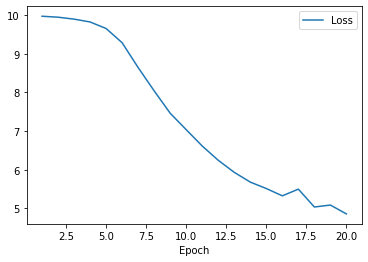

In [ ]:
df.plot(x ='Epoch', y='Loss', kind = 'line')

In [ ]:
# predict next token
def predict(net, tkn, lng, h1=None, h2=None):
         
  # tensor inputs
  if tkn in token2int:
      x = np.array([[token2int[tkn]]])
  else:
      x = np.array([[token2int['UNK']]])
  inputs1 = torch.from_numpy(x)
  inputs2 = torch.from_numpy(np.array([[lng]]))
  
  # push to GPU
  inputs1 = inputs1.cuda()
  inputs2 = inputs2.cuda()

  # detach hidden state from history
  h1 = tuple([each.data for each in h1])
  h2 = tuple([each.data for each in h2])

  # get the output of the model
  out, h1, h2 = net(inputs1, inputs2, h1, h2)

  # get the token probabilities
  p = F.softmax(out, dim=1).data

  p = p.cpu()

  p = p.numpy()
  p = p[0].reshape(p.shape[1],)

  # get indices of top 3 values
  top_n_idx = p.argsort()[-3:][::-1]

  # randomly select one of the three indices
  sampled_token_index = top_n_idx[random.sample([0,1,2],1)[0]]

  # return the encoded value of the predicted char and the hidden state
  return int2token[sampled_token_index], h1, h2


# function to generate text
def sample(net, size, prime='it is'):
        
    # push to GPU
    net.cuda()
    
    net.eval()

    # batch size is 1
    h1 = net.init_hidden(1)
    h2 = net.init_hidden(1)

    toks = prime.split()
    lang_seq = get_lang_seq(toks)

    # predict next token
    for i, t in enumerate(toks):
      token, h1, h2 = predict(net, t, lang_seq[i], h1, h2)
    
    toks.append(token)
    lang_seq.append(get_lang_seq([token])[0])

    # predict subsequent tokens
    for i in range(size-1):
        token, h1, h2 = predict(net, toks[-1], lang_seq[-1], h1, h2)
        toks.append(token)
        lang_seq.append(get_lang_seq([token])[0])
    return ' '.join(toks)

In [ ]:
sample(net, 5, prime='mera fight')

'mera fight formula hai to to bhi'

In [ ]:
for i in range(4):
  print(sample(net, 5, prime="india"))

india ka naam roshan kiya to
india me to ye log to
india ka bhi haal h ki
india ki baat nhi hai to


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="doctor"))

doctor ko bhi hai to to
doctor ka sath liya to ye
doctor ko bhi hai ki ye
doctor ki tarah khabar de raha


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="teacher"))

teacher ki baat nahi hota to
teacher ko to to koi problem
teacher ko to koi news nahi
teacher ki baat kar rahe h


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="comment"))

comment kr rahe ho aur ye
comment kar diya hai ki wo
comment kr diya to ye to
comment karne k baad bhi hai


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="modi"))

modi ko bhi bada harkat ho
modi g ka naam nhi hota
modi ji ko to ye to
modi ko vote dena chahiye to


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="life"))

life me bhi to koi chinta
life me to koi problem nhi
life ka sabse rang to ye
life me koi nahi puchta ki


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="bjp"))

bjp ki taraf ki hai to
bjp ko to koi problem nhi
bjp ka bhi bada bara bada
bjp ko to kya to koi


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="clean"))

clean maja kar rhe the or
clean ldkiyo ki zarurat h to
clean poti gain bna raha hai
clean maja kiya hai ye to


In [ ]:
for i in range(4):
  print(sample(net, 5, prime="respect"))

respect nahi hai to ek din
respect to koi bhi hetu nhi
respect nahi hota to kya hai
respect nhi hai jo log bhi


In [ ]:
# predict next token
def predict_prob(net, tkn, lng, trg, h1=None, h2=None):
            
    # tensor input
    if tkn in token2int:
        x = np.array([[token2int[tkn]]])
    else:
        x = np.array([[token2int['UNK']]])
    inputs1 = torch.from_numpy(x)
    inputs2 = torch.from_numpy(np.array([[lng]]))

    # push to GPU
    inputs1 = inputs1.cuda()
    inputs2 = inputs2.cuda()

    # detach hidden state from history
    h1 = tuple([each.data for each in h1])
    h2 = tuple([each.data for each in h2])

    # get the output of the model
    out, h1, h2 = net(inputs1, inputs2, h1, h2)

    # get the token probabilities
    p = F.softmax(out, dim=1).data

    p = p.cpu()

    p = p.numpy()
    p = p[0].reshape(p.shape[1],)

    if trg in token2int:
        prob = p[token2int[trg]]
    else:
        prob = p[token2int['UNK']]

    return prob, h1, h2


# function to calculate perplexity
def get_prob(net, x, y, l_x, l_y):

    # push to GPU
    net.cuda()

    net.eval()

    # batch size is 1
    h1 = net.init_hidden(1)
    h2 = net.init_hidden(1)

    N = len(x)
    tmp = 1

    for i, gram in enumerate(x):
        prob, h1, h2 = predict_prob(net, gram, l_x[i], y[i], h1, h2)
        if (i==0): 
          if (gram in word_counter): tmp*= word_counter[gram]/vocab_size
          else: tmp*= ind/vocab_size   
        else:
          tmp *= prob
        # print(gram,prob,tmp)

    return math.log(tmp)


def get_perp(prob,n):
  p = math.exp(prob*(1/n))
  return 1/p
  # return prob**(-1/n)

In [ ]:
# train_path = "/content/sample_data/train_CM.txt"
train_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Project/Dataset/CodeMix_train.txt"
train_file = open(train_path, "r")
count=0
perp=0
avg_perp=0

for lines in train_file:   
  if (count>10000): break
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","")
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    output=0
    # print(new_line)
    for i in range(0,len(new_line.split())):
      test_x=[]
      test_y=[]
      if (i < len(new_line.split())-4): 
          temp = [new_line.split()[i+j] for j in range(0,5)]
          temp_x = temp[:-1]
          temp_y = temp[1:]
          test_x = get_integer_seq(temp_x)
          test_y = get_integer_seq(temp_y)
          lang_x = get_lang_seq(temp_x)
          lang_y = get_lang_seq(temp_y)
          output += get_prob(net, test_x, test_y, lang_x, lang_y)
          # print("5 gram",output)
    if len(new_line.split())!=0:
      perp = get_perp(output,len(new_line.split()))
      # print("perp",perp)
    avg_perp+=perp
    count+=1

train_file.close()
avg_perp = avg_perp/count
print("avg perp",avg_perp)

avg perp 3.082649258679072e+24


In [ ]:
test_path = "/content/drive/My Drive/IIIT HYDERABAD/SEMESTER 6/NLP/Project/Dataset/test.txt"
# test_path = "/content/sample_data/test_CM.txt"
test_file = open(test_path, "r")
count=0
test_data=""
perp=0
avg_perp=0

for lines in test_file:
  if(count>10000): break
  ss = lines.isspace()
  if (not ss):
    lines = lines.replace("<unk>","")
    new_line = re.sub("[^a-zA-Z0-9 ]", "", lines).lower().strip()
    # new_line = "".join([char for char in lines if char not in string.punctuation]).lower().strip()+"\n"
    output=0
    for i in range(0,len(new_line.split())):
      test_x=[]
      test_y=[]
      if (i < len(new_line.split())-4): 
          temp = [new_line.split()[i+j] for j in range(0,5)]
          temp_x = temp[:-1]
          temp_y = temp[1:]
          test_x = get_integer_seq(temp_x)
          test_y = get_integer_seq(temp_y)
          lang_x = get_lang_seq(temp_x)
          lang_y = get_lang_seq(temp_y)
          output += get_prob(net, test_x, test_y, lang_x, lang_y)
    perp = get_perp(output,len(new_line.split()))
    avg_perp+=perp
    count+=1

test_file.close()
avg_perp = avg_perp/count
print(avg_perp)

3.088221400956692e+24


In [ ]:
print(net)

WordLSTM(
  (emb_layer): Embedding(21194, 200)
  (lstm1): LSTM(200, 256, num_layers=4, batch_first=True, dropout=0.3)
  (lstm2): LSTM(200, 256, num_layers=4, batch_first=True, dropout=0.3)
  (dropout1): Dropout(p=0.3, inplace=False)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=21194, bias=True)
)


In [ ]:
torch.save(net, '/content/model')